## The results here may be different from the results in the total file of final exam. I rerunned for several times. So take the results here as the final results please.

In [1]:
import pandas as pd
import numpy as np

## Data reading

In [2]:
train = pd.read_csv('ctrain.csv', header = None)

In [3]:
train

,0,1,2,3,4,5
0,0.585385,0.518833,0.457810,0.094280,0,1
1,0.705958,0.654958,0.514878,0.219656,0,1
2,0.579268,0.863228,0.437027,0.869473,0,1
3,0.951644,0.770822,0.078296,0.428559,0,1
4,0.499662,0.560521,0.630058,0.618843,0,1
...,...,...,...,...,...,...
145,0.752897,0.173620,0.718863,0.975656,1,0
146,0.601106,0.969755,0.590008,0.775430,1,0
147,0.095425,0.871820,0.114290,0.777152,1,0
148,0.284756,0.346061,0.534890,0.823065,1,0


In [4]:
test = pd.read_csv('ctest.csv', header = None)

In [5]:
test

,0,1,2,3
0,0.248782,0.876835,0.806854,0.020668
1,-0.057214,0.828857,0.617800,0.550427
2,0.735268,0.744176,0.792611,0.483154
3,0.352746,0.588804,0.404354,0.391265
4,0.219141,0.316855,0.104997,0.422342
5,0.661438,0.485857,0.738860,0.102217
6,1.013455,0.257351,0.868043,0.413509
7,0.417482,0.031578,0.337873,0.144518
8,0.520585,0.654922,0.126455,0.616839
9,0.581897,0.978328,0.727973,0.830095


## Data partitioning

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
mlp_train, mlp_val = train_test_split(train, test_size=0.1)

In [8]:
mlp_train.shape

(135, 6)

In [9]:
mlp_val.shape

(15, 6)

In [10]:
mlp_train = mlp_train.to_numpy()
mlp_val = mlp_val.to_numpy()

## MLP Class

In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

In [12]:
class MLP(torch.nn.Module):
    def __init__(self):
        super(MLP,self).__init__()
        self.fc1 = torch.nn.Linear(4,40)
        self.fc2 = torch.nn.Linear(40,30)
        self.fc3 = torch.nn.Linear(30,20)
        self.fc4 = torch.nn.Linear(20,2)
        
    def forward(self,X):
        out1 = F.tanh(self.fc1(X))
        out2 = F.tanh(self.fc2(out1))
        out3 = F.tanh(self.fc3(out2))
        predict = F.softmax(self.fc4(out3))
        return predict

In [13]:
model = MLP()
print(model)

MLP(
  (fc1): Linear(in_features=4, out_features=40, bias=True)
  (fc2): Linear(in_features=40, out_features=30, bias=True)
  (fc3): Linear(in_features=30, out_features=20, bias=True)
  (fc4): Linear(in_features=20, out_features=2, bias=True)
)


In [14]:
train_input_tensor = torch.tensor(mlp_train[:,0:4].copy())
train_output_tensor = torch.tensor(mlp_train[:,4:6].copy())
val_input_tensor = torch.tensor(mlp_val[:,0:4].copy())
val_output_tensor = torch.tensor(mlp_val[:,4:6].copy())

In [15]:
train_input_tensor.shape

torch.Size([135, 4])

In [16]:
train_output_tensor.shape

torch.Size([135, 2])

## MLP Training

In [17]:
EPOCH = 300
#BATCH_SIZE = 10
LR = 0.02

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=LR)
loss_func = nn.MSELoss()

error = pd.DataFrame(columns=['epoch', 'error'])

# start training and illustrate the
for epoch in range(EPOCH):
    # input data to predict
    prediction = model(train_input_tensor.float())
    
    # error between expected data and predicted data, pay attention on consequence
    # first is predicted, second is real value
    loss = loss_func(prediction, train_output_tensor.float())
    
    # start optimization
    # set gradient as 0 before each optimization
    optimizer.zero_grad()
    
    # error packpropogation
    loss.backward()
    
    # optimize parameters based on minimum loss
    optimizer.step()
    
    if epoch > 0:
        error = error.append(pd.DataFrame({'epoch':[epoch], 'error':[loss.data.numpy()]}))
    
    if epoch % 10 == 0:
        print('Epoch: ', epoch, '| train loss: %.4f' % loss.data)

Epoch:  0 | train loss: 0.2340
Epoch:  10 | train loss: 0.2262


E:\Anaconda\lib\site-packages\torch\nn\functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\yaoqi\AppData\Local\Temp/ipykernel_19952/2803515142.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  predict = F.softmax(self.fc4(out3))


Epoch:  20 | train loss: 0.2219
Epoch:  30 | train loss: 0.2078
Epoch:  40 | train loss: 0.1796
Epoch:  50 | train loss: 0.1632
Epoch:  60 | train loss: 0.1360
Epoch:  70 | train loss: 0.1023
Epoch:  80 | train loss: 0.0740
Epoch:  90 | train loss: 0.0564
Epoch:  100 | train loss: 0.0381
Epoch:  110 | train loss: 0.0270
Epoch:  120 | train loss: 0.0217
Epoch:  130 | train loss: 0.0185
Epoch:  140 | train loss: 0.0163
Epoch:  150 | train loss: 0.0145
Epoch:  160 | train loss: 0.0125
Epoch:  170 | train loss: 0.0072
Epoch:  180 | train loss: 0.0040
Epoch:  190 | train loss: 0.0022
Epoch:  200 | train loss: 0.0013
Epoch:  210 | train loss: 0.0009
Epoch:  220 | train loss: 0.0006
Epoch:  230 | train loss: 0.0005
Epoch:  240 | train loss: 0.0004
Epoch:  250 | train loss: 0.0003
Epoch:  260 | train loss: 0.0003
Epoch:  270 | train loss: 0.0003
Epoch:  280 | train loss: 0.0002
Epoch:  290 | train loss: 0.0002


In [18]:
error

,epoch,error
0,1,0.25432786
0,2,0.23143417
0,3,0.23881508
0,4,0.23259243
0,5,0.23030117
...,...,...
0,295,0.00018705899
0,296,0.00018505836
0,297,0.00018309239
0,298,0.00018116


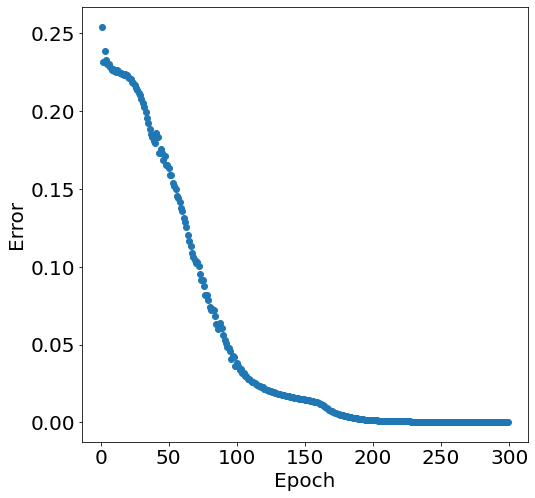

In [19]:
fig, ax = plt.subplots(figsize=(8,8))
ax.set_ylabel('Error', fontsize=20)
ax.set_xlabel('Epoch', fontsize=20)
plt.tick_params(labelsize=20)
ax.scatter(error['epoch'],error['error'])

# Post-proccessing on training set

In [20]:
prediction = model(train_input_tensor.float())
prediction = prediction.detach().numpy()
#prediction

E:\Anaconda\lib\site-packages\torch\nn\functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\yaoqi\AppData\Local\Temp/ipykernel_19952/2803515142.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  predict = F.softmax(self.fc4(out3))


In [21]:
for i in range(prediction.shape[0]):
    if prediction[i,0] > prediction[i,1]:
        prediction[i,0] = 1
        prediction[i,1] = 0
    else:
        prediction[i,0] = 0
        prediction[i,1] = 1
prediction

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.

In [22]:
print('The number of errors we meet after training:')
np.sum(np.absolute(prediction - mlp_train[:,4:6]))/2

The number of errors we meet after training:


0.0

In [23]:
# confusion matrix
cmat = np.zeros((2,2))
for i in range(prediction.shape[0]):
    cmat[int(prediction[i,0]),int(mlp_train[i,4])] += 1
print('The confusion matrix of training set is:')
print(cmat)

The confusion matrix of training set is:
[[85.  0.]
 [ 0. 50.]]


# Validation

In [24]:
# validation
prediction = model(val_input_tensor.float())
prediction = prediction.detach().numpy()
#prediction

C:\Users\yaoqi\AppData\Local\Temp/ipykernel_19952/2803515142.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  predict = F.softmax(self.fc4(out3))


In [25]:
for i in range(prediction.shape[0]):
    if prediction[i,0] > prediction[i,1]:
        prediction[i,0] = 1
        prediction[i,1] = 0
    else:
        prediction[i,0] = 0
        prediction[i,1] = 1
print('The number of errors we meet after training:')
np.sum(np.absolute(prediction - mlp_val[:,4:6]))/2

The number of errors we meet after training:


6.0

In [26]:
# confusion matrix
cmat = np.zeros((2,2))
for i in range(prediction.shape[0]):
    cmat[int(prediction[i,0]),int(mlp_val[i,4])] += 1
print('The confusion matrix of training set is:')
print(cmat)

The confusion matrix of training set is:
[[5. 5.]
 [1. 4.]]


# Testing

In [27]:
test_input_tensor = torch.tensor(test.to_numpy())

In [28]:
test

,0,1,2,3
0,0.248782,0.876835,0.806854,0.020668
1,-0.057214,0.828857,0.617800,0.550427
2,0.735268,0.744176,0.792611,0.483154
3,0.352746,0.588804,0.404354,0.391265
4,0.219141,0.316855,0.104997,0.422342
5,0.661438,0.485857,0.738860,0.102217
6,1.013455,0.257351,0.868043,0.413509
7,0.417482,0.031578,0.337873,0.144518
8,0.520585,0.654922,0.126455,0.616839
9,0.581897,0.978328,0.727973,0.830095


In [29]:
prediction = model(test_input_tensor.float())
prediction = prediction.detach().numpy()
prediction

E:\Anaconda\lib\site-packages\torch\nn\functional.py:1794: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
C:\Users\yaoqi\AppData\Local\Temp/ipykernel_19952/2803515142.py:13: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  predict = F.softmax(self.fc4(out3))


array([[1.0092394e-08, 1.0000000e+00],
       [7.1091478e-07, 9.9999928e-01],
       [6.5680681e-04, 9.9934322e-01],
       [4.4079153e-03, 9.9559206e-01],
       [9.9991679e-01, 8.3148734e-05],
       [9.9996579e-01, 3.4256533e-05],
       [9.5123160e-01, 4.8768390e-02],
       [9.9964368e-01, 3.5633278e-04],
       [9.8623812e-01, 1.3761877e-02],
       [5.1464154e-03, 9.9485356e-01],
       [1.7445565e-04, 9.9982554e-01],
       [9.9809688e-01, 1.9030763e-03],
       [9.9997616e-01, 2.3824879e-05],
       [1.7871274e-07, 9.9999988e-01],
       [9.1791445e-01, 8.2085550e-02],
       [1.7766207e-01, 8.2233787e-01],
       [2.2359261e-06, 9.9999774e-01],
       [1.3270065e-01, 8.6729938e-01],
       [3.5974868e-02, 9.6402508e-01],
       [1.0970445e-04, 9.9989033e-01]], dtype=float32)

In [30]:
for i in range(prediction.shape[0]):
    if prediction[i,0] > prediction[i,1]:
        prediction[i,0] = 1
        prediction[i,1] = 0
    else:
        prediction[i,0] = 0
        prediction[i,1] = 1
prediction

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [31]:
test = pd.read_csv('ctest.csv', header = None)
test['4'] = None
test['4'] = prediction[:,0]

## Final answer for the testing section:

In [32]:
test

,0,1,2,3,4
0,0.248782,0.876835,0.806854,0.020668,0.0
1,-0.057214,0.828857,0.617800,0.550427,0.0
2,0.735268,0.744176,0.792611,0.483154,0.0
3,0.352746,0.588804,0.404354,0.391265,0.0
4,0.219141,0.316855,0.104997,0.422342,1.0
5,0.661438,0.485857,0.738860,0.102217,1.0
6,1.013455,0.257351,0.868043,0.413509,1.0
7,0.417482,0.031578,0.337873,0.144518,1.0
8,0.520585,0.654922,0.126455,0.616839,1.0
9,0.581897,0.978328,0.727973,0.830095,0.0
